# Learning Theory Homework 
***
**Name**: Poorwa Hirve (pohi2375)
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

**Solution:**

As degenerate triangles are allowed, we can choose any 3 points in the finite integer interval [0, 99] for x and [0, 99] for y. 

All the points together become 100 * 100 = 10,000 points. 

We can choose 3 points for the hypothesis with these as following:
H = $^{10000}{\bf C}_{3}$

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

**Solution:**

Using the value of H in the formula we get:

$$
m \geq \frac{1}{\epsilon} (\log |H| + \log\frac{1}{\delta})
$$

Which is:

$$
m \geq \frac{1}{0.15} (\log |^{10000}{\bf C}_{3}| + \log\frac{1}{0.05})
$$
$$
m \geq \frac{1}{0.15} (\log |166,616,670,000| + \log\frac{1}{0.05})
$$
$$
m \geq 6.67 * (25.84 + 2.99)
$$

Therefore: m ${\geq}$ 192.29

So the bounds should be m ${\geq}$ 193.

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

**Solution:**

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import random
%matplotlib inline 

def plot_vcdim2():
    circle1 = plt.Circle((0, 0), 5, color='k', fill=False, clip_on=False)

    fig, ax = plt.subplots(2,2)

    x1 = 2
    y1 = 2
    x2 = 7
    y2 = 5


    ax[0,0].add_artist(circle1)
    ax[0,0].axis('equal')

    ax[0,0].set_xlim(-20, 20)
    ax[0,0].set_ylim(-20, 20)
    
    ax[0,0].plot(x1, y1, 'ro')
    ax[0,0].plot(x2, y2, 'bo')
    ax[0,0].set_title('Origin centered circles for 2 points')

#     plt.plot(x1, y1, 'ro')
#     plt.plot(x2, y2, 'bo')
#     plt.show()

    circle2 = plt.Circle((0, 0), 5, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[0,1].add_artist(circle2)
    ax[0,1].axis('equal')

    ax[0,1].set_xlim(-20, 20)
    ax[0,1].set_ylim(-20, 20)
    
    ax[0,1].plot(x1, y1, 'bo')
    ax[0,1].plot(x2, y2, 'ro')
    
    ax[0,1].set_title('(red: pos, blue: neg)')
#     plt.plot(x1, y1, 'ro')
#     plt.plot(x2, y2, 'ro')
#     plt.show()

    circle3 = plt.Circle((0, 0), 10, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[1,0].add_artist(circle3)
    ax[1,0].axis('equal')
    ax[1,0].set_xlim(-20, 20)
    ax[1,0].set_ylim(-20, 20)
    
    ax[1,0].plot(x1, y1, 'ro')
    ax[1,0].plot(x2, y2, 'ro')
#     plt.plot(x1, y1, 'bo')
#     plt.plot(x2, y2, 'ro')
#     plt.show()

    circle4 = plt.Circle((0, 0), 10, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[1,1].add_artist(circle4)
    ax[1,1].axis('equal')

    ax[1,1].set_xlim(-20, 20)
    ax[1,1].set_ylim(-20, 20)
    ax[1,1].plot(x1, y1, 'bo')
    ax[1,1].plot(x2, y2, 'bo')
#     plt.plot(x1, y1, 'bo')
#     plt.plot(x2, y2, 'bo')
#     plt.title('Origin centered circles')

    plt.show()
    
def plot_vcdim3():
    circle1 = plt.Circle((0, 0), 4, color='k', fill=False, clip_on=False)

    fig, ax = plt.subplots(2,2)

    x1 = 2
    y1 = 2
    x2 = 6
    y2 = 4
    x3 = 10
    y3 = -2


    ax[0,0].add_artist(circle1)
    ax[0,0].axis('equal')

    ax[0,0].set_xlim(-20, 20)
    ax[0,0].set_ylim(-20, 20)
    
    ax[0,0].plot(x1, y1, 'ro')
    ax[0,0].plot(x2, y2, 'bo')
    ax[0,0].plot(x3, y3, 'bo')
#     plt.plot(x1, y1, 'ro')
#     plt.plot(x2, y2, 'bo')
#     plt.show()
    ax[0,0].set_title('Origin centered circles for 3 points')
    circle2 = plt.Circle((0, 0), 8, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[0,1].add_artist(circle2)
    ax[0,1].axis('equal')

    ax[0,1].set_xlim(-20, 20)
    ax[0,1].set_ylim(-20, 20)
    
    ax[0,1].plot(x1, y1, 'bo')
    ax[0,1].plot(x2, y2, 'bo')
    ax[0,1].plot(x3, y3, 'ro')
    
    ax[0,1].set_title('(red: pos, blue: neg)')

#     plt.plot(x1, y1, 'ro')
#     plt.plot(x2, y2, 'ro')
#     plt.show()

    circle3 = plt.Circle((0, 0), 7, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[1,0].add_artist(circle3)
    ax[1,0].axis('equal')
    ax[1,0].set_xlim(-20, 20)
    ax[1,0].set_ylim(-20, 20)
    
    ax[1,0].plot(x1, y1, 'ro')
    ax[1,0].plot(x2, y2, 'ro')
    ax[1,0].plot(x3, y3, 'bo')
#     plt.plot(x1, y1, 'bo')
#     plt.plot(x2, y2, 'ro')
#     plt.show()

    circle4 = plt.Circle((0, 0), 5, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[1,1].add_artist(circle4)
    ax[1,1].axis('equal')

    ax[1,1].set_xlim(-20, 20)
    ax[1,1].set_ylim(-20, 20)
    ax[1,1].plot(x1, y1, 'bo')
    ax[1,1].plot(x2, y2, 'ro')
    ax[1,1].plot(x3, y3, 'bo')

#     plt.plot(x1, y1, 'bo')
#     plt.plot(x2, y2, 'bo')

    plt.show()


    circle5 = plt.Circle((0, 0), 3, color='k', fill=False, clip_on=False)

    fig, ax = plt.subplots(2,2)

    ax[0,0].add_artist(circle5)
    ax[0,0].axis('equal')

    ax[0,0].set_xlim(-20, 20)
    ax[0,0].set_ylim(-20, 20)
    ax[0,0].plot(x1, y1, 'ro')
    ax[0,0].plot(x2, y2, 'bo')
    ax[0,0].plot(x3, y3, 'ro')

#     plt.plot(x1, y1, 'bo')
#     plt.plot(x2, y2, 'bo')
#     plt.show()
    
    circle6 = plt.Circle((0, 0), 11, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[0,1].add_artist(circle6)
    ax[0,1].axis('equal')

    ax[0,1].set_xlim(-20, 20)
    ax[0,1].set_ylim(-20, 20)
    ax[0,1].plot(x1, y1, 'bo')
    ax[0,1].plot(x2, y2, 'bo')
    ax[0,1].plot(x3, y3, 'bo')

#     plt.plot(x1, y1, 'bo')
#     plt.plot(x2, y2, 'bo')
#     plt.show()
    
    circle7 = plt.Circle((0, 0), 11, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[1,0].add_artist(circle7)
    ax[1,0].axis('equal')

    ax[1,0].set_xlim(-20, 20)
    ax[1,0].set_ylim(-20, 20)
    ax[1,0].plot(x1, y1, 'ro')
    ax[1,0].plot(x2, y2, 'ro')
    ax[1,0].plot(x3, y3, 'ro')

#     plt.plot(x1, y1, 'bo')
#     plt.plot(x2, y2, 'bo')
#     plt.show()
    
    circle8 = plt.Circle((0, 0), 4, color='k', fill=False, clip_on=False)

#     fig, ax = plt.subplots()

    ax[1,1].add_artist(circle8)
    ax[1,1].axis('equal')

    ax[1,1].set_xlim(-20, 20)
    ax[1,1].set_ylim(-20, 20)
    ax[1,1].plot(x1, y1, 'bo')
    ax[1,1].plot(x2, y2, 'ro')
    ax[1,1].plot(x3, y3, 'ro')

#     plt.plot(x1, y1, 'bo')
#     plt.plot(x2, y2, 'bo')
    plt.show()

The VC Dimension of this hypothesis class is $2$.  To prove this, we need to show the shattering of a particular set of $2$ points, and then prove that no set of $3$ points can be shattered.  

Let $x_1$, $x_2$ be points positioned on 2 points on the x-y axes as the following.  There are $2^2=4$ possible dichotomies on $x_1$, $x_2$.  We need to show that we can accurately classify all of them. 

|${x_1}$| ${x_2}$|
|-------|-------|
|+|+|
|+|-|
|-|+|
|-|-| 

To prove that the $\textrm{VCdim}(H) \geq 2$, we have to show that for some sample of 2 points, all 2^2 = 4 points can be shattered by either of the hypotheses.

Taking points at (x1, y1) = (2, 2) and (x2, y2) = (7, 5)
Let's plot the points such that positive points are red and negative points are blue.

Assuming that none of the points can lie on top of each other, and that the points are distinct without loss of generality. Let us also assume that the two kinds of hypothesis will be referred to as hypothesis 1 and hypothesis 2, respectively to their representation as mentioned in the question.

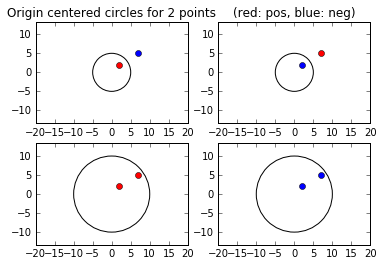

In [2]:
plot_vcdim2()

As seen from the above graphs, the hypothesis shatters some sample of 2 points, so $\textrm{VCdim}(H) \geq 2$.

Mathematical proof:
Order them as $x_1 < x_2$. Let us see the $2^2 = 4$ labels:
1. Consider labels as $y_1 = +1$ and $y_2 = -1$.  
    We can see that a circle of radius r such that $x_1 \leq r < x_2$ satisfying hypothesis 1.
2. Consider labels as $y_1 = -1$ and $y_2 = +1$.  
    We can see that a circle of radius r such that $x_1 < r \leq x_2$ satisfying hypothesis 2.
3. Consider labels as $y_1 = +1$ and $y_2 = +1$.  
    We can see that a circle of radius r such that $r \geq x_2$ satisfying hypothesis 1.
4. Consider labels as $y_1 = -1$ and $y_2 = -1$.  
    We can see that a circle of radius r such that $r > x_2$ satisfying hypothesis 2.
    
Hence, $\textrm{VCdim}(H) \geq 2$.

Next to prove that $\textrm{VCdim}(H) < 3$ by showing that no set of 3 points can be shattered. 

|${x_1}$| ${x_2}$| ${x_3}$
|-------|-------|------|
|+|+|-|
|-|-|+|
|+|-|-|
|-|+|+|
|+|-|+|
|-|+|-|
|-|-|-|
|+|+|+|


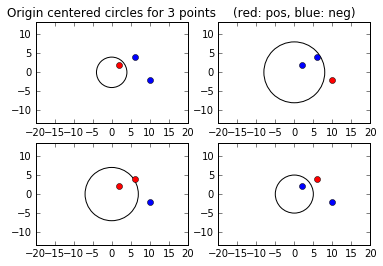

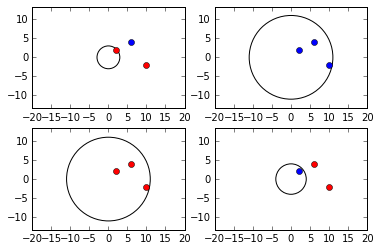

In [3]:
plot_vcdim3()

As seen from the above graphs, the hypothesis fails to shatter a sample of 3 points.

1) Assuming that none of the points can lie on top of each other, and that the points are distinct without loss of generality.

Mathematical proof:
Order them as $x_1 < x_2 < x_3$. Let us see the $2^3 = 8$ labels:
1. Consider labels as $y_1 = +1, y_2 = +1$ and $y_3 = -1$.  
    We can see that a circle of radius r such that $x_2 \leq r < x_3$ satisfying hypothesis 1.
2. Consider labels as $y_1 = -1, y_2 = -1$ and $y_3 = +1$.  
    We can see that a circle of radius r such that $x_2 < r \leq x_3$ satisfying hypothesis 2.
3. Consider labels as $y_1 = +1, y_2 = -1$ and $y_3 = -1$.  
    We can see that a circle of radius r such that $x_1 \leq r < x_2$ satisfying hypothesis 1.
4. Consider labels as $y_1 = -1, y_2 = +1$ and $y_3 = +1$.  
    We can see that a circle of radius r such that $x_1 < r \leq x_2$ satisfying hypothesis 2.
5. Consider labels as $y_1 = +1, y_2 = -1$ and $y_3 = +1$.
    - Since $y_1 = +1$ must have $r \leq x_1$ according to hypothesis 1, and  
    Since $y_3 = +1$ must have $r \leq x_3$ according to hypothesis 1  
    Then $x_1 < x_2 < x_3$ with $r \leq x_3$
    
    But $y_2 = -1$ which is a contradiction.  
      
    - Since $y_1 = +1$ must have $r \geq x_1$ according to hypothesis 2, and  
    Since $y_3 = +1$ must have $r \geq x_3$ according to hypothesis 2  
    Then $x_1 < x_2 < x_3$ with $r \geq x_1$
    
    But $y_2 = -1$ which is a contradiction.  

    We can see that no circle satisfies the hypothesis.
    
6. Consider labels as $y_1 = -1, y_2 = +1$ and $y_3 = -1$. 
    - Since $y_1 = -1$ must have $r > x_1$ according to hypothesis 2, and  
    Since $y_3 = -1$ must have $r > x_3$ according to hypothesis 2  
    Then $x_1 < x_2 < x_3$ with $r > x_3$
    
    But $y_2 = +1$ which is a contradiction.  
      
    - Since $y_1 = -1$ must have $r < x_1$ according to hypothesis 1, and  
    Since $y_3 = -1$ must have $r < x_3$ according to hypothesis 1  
    Then $x_1 < x_2 < x_3$ with $r < x_1$
    
    But $y_2 = +1$ which is a contradiction.  
    
    We can see that no circle satisfies the hypothesis.
7. Consider labels as $y_1 = +1, y_2 = +1$ and $y_3 = +1$.  
    We can see that a circle of radius r such that $r \geq x_3$ satisfying hypothesis 1.
8. Consider labels as $y_1 = -1, y_2 = -1$ and $y_3 = -1$.  
    We can see that a circle of radius r such that $r > x_3$ satisfying hypothesis 2.
    
2) Assuming that the points can lie on top of each other, both parts of the hypothesis fails to shatter in the case where alternate labels are used for the points (points 5 and 6).

Hence, $\textrm{VCdim}(H) < 3$.

$\textrm{VCdim}(H) = 2$.

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

In [4]:
def generate_concept():
    
#     if normal_flag == True:
#         x1 = random.normalvariate(50.0, 25.0)
#         y1 = random.normalvariate(50.0, 25.0)
#         x2 = random.normalvariate(50.0, 25.0)
#         y2 = random.normalvariate(50.0, 25.0)
    
#         width = random.uniform(0.0, 100.0 - x1)
#         height = random.uniform(0.0, 100.0 - y1)
    
#         x2 = x1 +  width
#         y2 = y1 + height
    
#         return [x1, y1, x2, y2]

#         return np.random.normal(50, 25, 4)
    
    x1 = random.uniform(0.0, 100.0)
    y1 = random.uniform(0.0, 100.0)
    
    width = random.uniform(0.0, 100.0 - x1)
    height = random.uniform(0.0, 100.0 - y1)
    
    x2 = x1 +  width
    y2 = y1 + height
    
    return [x1, y1, x2, y2]

def get_label(C, vector):
    x = vector[0]
    y = vector[1]
    x1 = C[0]
    y1 = C[1]
    x2 = C[2]
    y2 = C[3]
    
    start_x = min([x1, x2])
    end_x = max([x1, x2])
    start_y = min([y1, y2])
    end_y = max([y1, y2])
    width = abs(y1 - y2)
    length = abs(x1 - x2)
    xflag = False
    yflag = False
    if x >= start_x and x <= end_x:
        xflag = True
    if y >= start_y and y <= end_y:
        yflag = True

    if xflag and yflag == True:
        return 1
    else:
        return -1
    
def get_hypothesis(train_vectors, C):
    H = [-1,-1,-1,-1]

    x_points = []
    y_points = []
    for i in range(len(train_vectors)):
        if get_label(C, train_vectors[i]) == 1:
            x_points.append(train_vectors[i][0])
            y_points.append(train_vectors[i][1])
    try:        
        H[0] = min(x_points)
        H[1] = min(y_points)
        H[2] = max(x_points)
        H[3] = max(y_points)

        return H
    
    except:
        return None


In [5]:
def plot_all(C, H, vectors):
    x1 = C[0]
    y1 = C[1]
    x2 = C[2]
    y2 = C[3]
    
    start_x = min([x1, x2])
    end_x = max([x1, x2])
    start_y = min([y1, y2])
    end_y = max([y1, y2])
    length = abs(y1 - y2)
    width = abs(x1 - x2)
    x1_h = H[0]
    y1_h = H[1]
    x2_h = H[2]
    y2_h = H[3]
    starth_x = min([x1_h, x2_h])
    endh_x = max([x1_h, x2_h])
    starth_y = min([y1_h, y2_h])
    endh_y = max([y1_h, y2_h])
    lengthh = abs(y1_h - y2_h)
    widthh = abs(x1_h - x2_h)


    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    for p in [
        patches.Rectangle(
        (start_x, start_y), width,length,linewidth=2,edgecolor='r',facecolor='none',
        fill=False
    ),
    patches.Rectangle(
        (starth_x, starth_y), widthh,lengthh,linewidth=2,edgecolor='k',facecolor='none',
        fill=False
    ),
    ]: 
        ax3.add_patch(p)
    
    x_plus_plot = []
    y_plus_plot = []
    
    x_minus_plot = []
    y_minus_plot = []
    
    for i in range(len(vectors)):
        if get_label(C, vectors[i]) == 1:
            x_plus_plot.append(vectors[i][0])
            y_plus_plot.append(vectors[i][1])
        else:
            x_minus_plot.append(vectors[i][0])
            y_minus_plot.append(vectors[i][1])

    plt.plot(x_plus_plot, y_plus_plot, 'ro', label='positive')
    plt.plot(x_minus_plot, y_minus_plot, 'bo', label='negative')
    ax3.set_xlim(0, 100)
    ax3.set_ylim(0, 100)
    plt.legend()
    plt.show()

In [6]:
def get_training_examples(m, normal_flag=False):
    training_vectors = []
    if normal_flag == True:
        for i in range(m):
            x = random.normalvariate(50.0, 25.0)
            y = random.normalvariate(50.0, 25.0)
            training_vectors.append([x, y])
        return training_vectors
    
    for i in range(m):
        x = random.uniform(0.0, 100.0)
        y = random.uniform(0.0, 100.0)
        training_vectors.append([x, y])
    
    return training_vectors

def get_test_examples(normal_flag=False):
    
    test_vectors = []
    if normal_flag == True:
        for i in range(1000):
            x = random.normalvariate(50.0, 25.0)
            y = random.normalvariate(50.0, 25.0)
            test_vectors.append([x, y])
        return test_vectors
    
    for i in range(1000):
        x = random.uniform(0.0, 100.0)
        y = random.uniform(0.0, 100.0)
        test_vectors.append([x, y])
    
    return test_vectors

def get_generalization_errors(ms, runs, delta, normal_flag=False):
    
    gen_total_errors = []
    theoretical_errors = []
    
    for i in range(runs):
        C = generate_concept()
        gen_errors = []
        for m in ms:
        
            training_vectors = get_training_examples(m, normal_flag)
            test_vectors = get_test_examples(normal_flag)

            H = get_hypothesis(training_vectors, C)

            while H is None:
                C = generate_concept()
                H = get_hypothesis(training_vectors, C)

            err_count = 0
            for i in range(len(test_vectors)):
                if get_label(H, test_vectors[i]) != get_label(C, test_vectors[i]):
                    err_count += 1

            gen_errors.append(round(float(err_count) / float(len(test_vectors)), 5))
            if len(theoretical_errors) <= 4:
                theoretical_errors.append(float(4)/float(m) * math.log((float(4)/delta)))
        gen_total_errors.append(gen_errors)
    
    gen_conf_errors = get_confident_error(gen_total_errors, delta)
    
    return gen_conf_errors, theoretical_errors

def show_plots(C, H, training_vectors, test_vectors):
    plot_all(C, H, training_vectors)
    plot_all(C, H, test_vectors)
    
def get_confident_error(gen_total_errors, delta):
    gen_conf_errors = []
#     print (len(gen_total_errors[0]))
    for i in range(len(gen_total_errors[0])):
        gen_errors = []
        for j in range(len(gen_total_errors)):
            gen_errors.append(gen_total_errors[j][i])
#         print (gen_errors)
        confidence = len(gen_errors) - (delta * len(gen_errors))
        gen_errors = sorted(gen_errors)
        gen_conf_errors.append(gen_errors[int(confidence)])
    return gen_conf_errors


**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

In [7]:
# run code for m = 250,500,1000,1250,1500
import math
ms = [250, 500, 1000, 1250, 1500]

theoretical_errors = []

gen_errors, theoretical_errors = get_generalization_errors(ms, 100, 0.05, normal_flag=False)

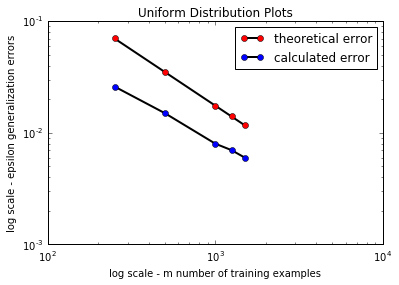

In [8]:
# m>4/ε(log(4/δ))

# print (theoretical_errors)
# print (gen_errors)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(ms, theoretical_errors,  color='k', marker='o', linestyle='-',
        linewidth=2, markerfacecolor='r', label='theoretical error')
plt.plot(ms, gen_errors, color='k', marker='o', linestyle='-',
        linewidth=2, markerfacecolor='b', label='calculated error')


plt.title('Uniform Distribution Plots')
plt.ylabel('log scale - epsilon generalization errors')
plt.xlabel('log scale - m number of training examples')
plt.legend()
plt.show()

**Results:**  
The graph shows that as the number of training examples increase, there is a decrease in the generalization error. The overlay of the theoretical PAC bound (in red) is above the calculated generalization errors (in blue) as the theoretical bound will be a worst case assumption of the hypothesis.  
As expected, there is a decreasing trend in the graph as the model generalizes better for more training examples.  
With increase in m, the two lines of the respective generalization errors start to converge.

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

In [9]:
ms = [250, 500, 1000, 1250, 1500]

theoretical_errors = []

gen_errors, theoretical_errors = get_generalization_errors(ms, 100, 0.05, normal_flag=True)

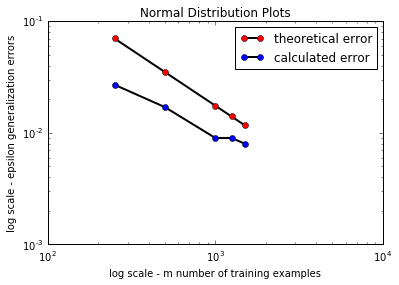

In [10]:
# m>4/ε(log(4/δ))

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.plot(ms, theoretical_errors,  color='k', marker='o', linestyle='-',
        linewidth=2, markerfacecolor='r', label='theoretical error')
plt.plot(ms, gen_errors, color='k', marker='o', linestyle='-',
        linewidth=2, markerfacecolor='b', label='calculated error')


plt.title('Normal Distribution Plots')
plt.ylabel('log scale - epsilon generalization errors')
plt.xlabel('log scale - m number of training examples')
plt.legend()
plt.show()

**Results:**  
The graph shows that as the number of training examples increase, there is a decrease in the generalization error.  
As expected, there is a decreasing trend similar to Part B as the error is calculated based on number of misclassified examples and is not based on the distribution of the data points.

<center> <big> <big> <b> The above graphs were for 100 concepts. Now increasing the runs to 500, we can compare the two as follows, with similar results:</b> </center>

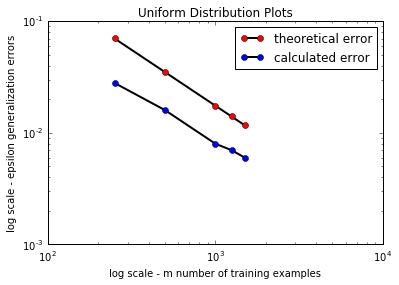

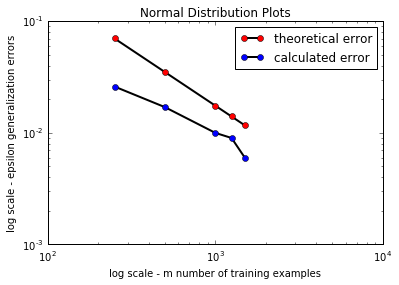

In [11]:
ms = [250, 500, 1000, 1250, 1500]

theoretical_errors = []

gen_errors, theoretical_errors = get_generalization_errors(ms, 500, 0.05, normal_flag=False)


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.plot(ms, theoretical_errors,  color='k', marker='o', linestyle='-',
        linewidth=2, markerfacecolor='r', label='theoretical error')
plt.plot(ms, gen_errors, color='k', marker='o', linestyle='-',
        linewidth=2, markerfacecolor='b', label='calculated error')


plt.title('Uniform Distribution Plots')
plt.ylabel('log scale - epsilon generalization errors')
plt.xlabel('log scale - m number of training examples')
plt.legend()
plt.show()

gen_errors, theoretical_errors = get_generalization_errors(ms, 500, 0.05, normal_flag=True)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.plot(ms, theoretical_errors,  color='k', marker='o', linestyle='-',
        linewidth=2, markerfacecolor='r', label='theoretical error')
plt.plot(ms, gen_errors, color='k', marker='o', linestyle='-',
        linewidth=2, markerfacecolor='b', label='calculated error')


plt.title('Normal Distribution Plots')
plt.ylabel('log scale - epsilon generalization errors')
plt.xlabel('log scale - m number of training examples')
plt.legend()
plt.show()